In [59]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.signal import find_peaks
import sys
import os
import pandas as pd

In [60]:
#Function definitions
#Import theoretical spectra. Names follow the convention "molecule form wide functional"
#molecule='68'
#form='closed'
#functional=['pbe0','pbe0-d3']
def read_theo(mol,f,fun):
    script_dir = os.getcwd()
    filename=mol+' '+f+" wide "+fun+'.txt'
#Relative path to directory with theoretical spectra e.g. 0068_closed
    rel_path='00'+mol+'_'+f+'/'
    path=os.path.join(script_dir,rel_path)
    theo_spec=genfromtxt(path+filename, delimiter='     ',dtype=float)
    return theo_spec
#Theoretical peak detection
def theo_peaks(SF,wavenumbers_theo,heights_theo):
    #D=8
    D=2
    H=0.02
    peaks_theo, _ = find_peaks(heights_theo,height=H,threshold=T,distance=D)
    return peaks_theo
#error calculation
#Calculate errors
def calculate_MAE():
    print("Error calculation:")

    #tolerance for wavenumbers (when range jump is required)
    tol=30.0
    #tolerance for height ratio (when the exp and theoretical heights are so off that the band assignement must be wrong)
    htol=5.0
    error=[]
    j=0
    #print(range(len(y)))
    #print(range(len(y_theo)))
    assigned=[]
    assigned_theo_number=[]
    assigned_exp_number=[]
    for i in range(len(y)):
     #   print(i)
        while True:
            if y[i]<500:
                break
            if j==len(y_theo)-1:
                print("End of theoretical spectrum")
                break
   #         elif i==len(y)-1:
    #            print("End of experimental spectrum")
     #           break
            else:
                if y[i]-y_theo[j]<-tol :
                    print('error > ',tol,', skipping the experimental peak ',y[i],' cm-1 height ',h_exp[i])
                    break
     #           print(heights[i])
     #           print(heights_theo[j])

   #             if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]):
                if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]) and h_exp[i]/h_theo[j]<htol and h_theo[j]/h_exp[i]<htol:
                        if y[i]-y_theo[j]>tol or  y[i]-y_theo[j]<-tol:
                            print((y[i]-y_theo[j],y[i],y_theo[j]))
                            print('error > ',tol,', skipping the experimental peak')
                            break
                        else:
                            error.append(y[i]-y_theo[j])
                            assigned.append([y[i],y_theo[j]])
                            assigned_theo_number.append(j)
                            assigned_exp_number.append(i) 
                        
   #                     print("IF",(y[i]-y_theo[j],y[i],y_theo[j]))
    #                    print(h_exp[i])
    #                    print(h_theo[j])
    #                    print(heights[i])
   #                     print(heights_theo[j])
                            j=j+1
                            break
                else:
                        j=j+1
      #                  print("ELSE",(y[i]-y_theo[j],y[i],y_theo[j]))
     #                   print((y[i]-y_theo[j+1],y[i],y_theo[j+1]))
     #                   print(h_exp[i])
     #                   print(h_theo[j])
#                        error.append(y[i]-y_theo[j])
#                        assigned.append([y[i],y_theo[j]])
#                print(i,j)

 #   print(assigned_theo_number)
 #   print(assigned_exp_number)
#print(heights)
#print(heights_theo)
    print("\n {} peaks were assigned. Scaling factor of {} was used for the theoretical spectrum.\n".format(len(error),SF))
  #  t=[range(len(error)),assigned[0], assigned [1],[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number]]
  #  df=pd.DataFrame(assigned,[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number],["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"])
    df=pd.DataFrame(assigned,columns=["Exp. waveno.","Scaled theo. waveno."])
 #   df["Theor. unscaled waveno"]=[i/SF for i in assigned[1]]
    df["Exp. peak height"]=[h_exp[i] for i in assigned_exp_number]
    df["Theo. peak height"]=[h_theo[i] for i in assigned_theo_number]
    df['Deviations']=df["Exp. waveno."]-df["Scaled theo. waveno."]
    display(df)
 #   table=tabulate(transposedT,headers= ["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"],tablefmt='simple')
 #   print(table)
   # print("   |Exp. waveno. | Scaled theor. waveno. |  Theor. unscaled waveno | cm-1|   Exp. peak height (normalized) | Theor. peak height (normalized)")
 #   k=0
#    for i in assigned:
 #       w=assigned_exp_number[k]
 #       v=assigned_theo_number[k]
 #       print(k," | ",i[0]," | ",i[1],"         | ", i[1]/SF," |    |",h_exp[w],"         | ",h_theo[v])
  #      k=k+1

    print("\n Mean absolute error: \n")
    MAE=   sum(abs(i) for i in error)/len(error)
    print("MAE = {} cm-1".format(round(MAE,2)))
    return MAE,len(error)


In [61]:
script_dir = os.getcwd()
np.set_printoptions(precision=6,threshold=sys.maxsize)

In [62]:
#set parameters
H=0.04
#H=0.05
T=0.0
D=8
#experimental resolution
res=8.0

In [63]:
#Input data parameters
# Names of theoretical spectra files follow the convention "molecule form wide functional"
molecule='68'
form='closed'
functional=["pbe0","pbe0-d3",'b3lyp', 'b3lyp-d3', 'cam-b3lyp', 'cam-b3lyp-d3','m06l','wb97-xd']
#scaling factors for given functionals
scaling_f={'pbe0':0.95, 'pbe0-d3':0.95, 'b3lyp': 0.959, 'b3lyp-d3': 0.959, 'cam-b3lyp': 0.951, 'cam-b3lyp-d3': 0.951,'m06l': 0.951, 'wb97-xd': 0.95}


In [64]:
#Read in the experimental data for the selected molecule
#Data  in two columns without headers, separated by comma
exp_spec = genfromtxt('Sheet1_68_closed_ok.csv', delimiter=',',dtype=float)
wavenumbers=exp_spec[:,0]
heights=exp_spec[:,1]/max(exp_spec[:,1])
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
peaks, _ = find_peaks(heights,height=H,threshold=T,distance=D)
y=[wavenumbers[j] for j in peaks]
h_exp=[heights[j] for j in peaks]
print("Peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y)
no_of_peaks=len(y)
print("{} peaks fulfilling the criteria in experimental spectrum".format(no_of_peaks))

Peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[505.2833, 555.4258, 566.033, 615.2113, 851.4601, 933.424, 968.1381, 978.7452, 986.4595, 1000.924, 1061.673, 1133.995, 1158.102, 1182.208, 1192.816, 1210.173, 1253.565, 1274.78, 1303.708, 1336.494, 1365.422, 1379.886, 1443.529, 1558.278, 1594.921, 1631.563, 1653.742, 1746.313, 2862.95, 2925.629, 2953.593, 2975.771]
32 peaks fulfilling the criteria in experimental spectrum


pbe0
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[496.84999999999997, 544.35, 551.9499999999999, 606.1, 628.9, 728.65, 774.25, 802.75, 833.15, 909.15, 941.4499999999999, 964.25, 981.3499999999999, 1053.55, 1079.2, 1103.8999999999999, 1130.5, 1141.8999999999999, 1165.6499999999999, 1182.75, 1206.5, 1232.1499999999999, 1290.1, 1307.2, 1331.8999999999999, 1368.95, 1381.3, 1384.1499999999999, 1609.3, 1642.55, 1653.0, 1660.6, 2902.25, 2910.7999999999997, 2981.1, 3015.2999999999997]


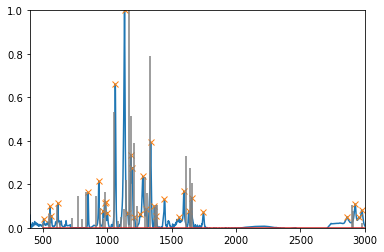

Error calculation:
error >  30.0 , skipping the experimental peak  566.033  cm-1 height  0.05567600622637313
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1192.816  cm-1 height  0.27688597954191685
error >  30.0 , skipping the experimental peak  1253.565  cm-1 height  0.06311846786746719
(59.37900000000013, 1443.529, 1384.1499999999999)
error >  30.0 , skipping the experimental peak
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
(85.71300000000019, 1746.313, 1660.6)
error >  30.0 , skipping the experimental peak
error >  30.0 , skipping the experimental peak  2862.95  cm-1 height  0.050019457416055145
End of theoretical spectrum

 21 peaks were assigned. Scaling factor of 

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,496.85,0.04,0.02,8.43
1,555.43,551.95,0.10,0.06,3.48
2,615.21,606.10,0.11,0.10,9.11
3,851.46,833.15,0.16,0.16,18.31
4,933.42,941.45,0.22,0.09,-8.03
5,968.14,964.25,0.08,0.04,3.89
6,978.75,981.35,0.12,0.17,-2.60
7,1061.67,1053.55,0.66,0.53,8.12
8,1133.99,1141.90,1.00,0.22,-7.90
9,1182.21,1206.50,0.34,0.39,-24.29



 Mean absolute error: 

MAE = 10.14 cm-1
10.139923809523799 21
pbe0-d3
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[497.79999999999995, 545.3, 552.9, 606.1, 629.85, 729.5999999999999, 776.15, 803.6999999999999, 836.0, 912.9499999999999, 943.3499999999999, 967.0999999999999, 981.3499999999999, 1053.55, 1080.1499999999999, 1105.8, 1129.55, 1143.8, 1166.6, 1183.7, 1204.6, 1235.0, 1292.0, 1310.05, 1332.85, 1368.95, 1381.3, 1613.1, 1643.5, 1653.9499999999998, 1663.4499999999998, 2901.2999999999997, 2909.85, 2980.1499999999996, 3014.35]


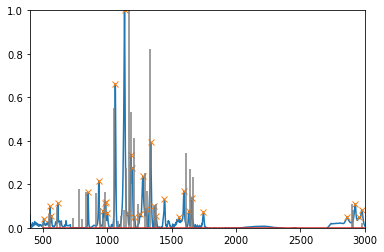

Error calculation:
error >  30.0 , skipping the experimental peak  566.033  cm-1 height  0.05567600622637313
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1192.816  cm-1 height  0.27688597954191685
error >  30.0 , skipping the experimental peak  1253.565  cm-1 height  0.06311846786746719
error >  30.0 , skipping the experimental peak  1443.529  cm-1 height  0.13067739604180564
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
(82.86300000000028, 1746.313, 1663.4499999999998)
error >  30.0 , skipping the experimental peak
error >  30.0 , skipping the experimental peak  2862.95  cm-1 height  0.050019457416055145
End of theoretical spectrum

 21 peaks were assigned. Scaling fact

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,497.80,0.04,0.02,7.48
1,555.43,552.90,0.10,0.07,2.53
2,615.21,606.10,0.11,0.09,9.11
3,851.46,836.00,0.16,0.17,15.46
4,933.42,943.35,0.22,0.09,-9.93
5,968.14,967.10,0.08,0.04,1.04
6,978.75,981.35,0.12,0.17,-2.60
7,1061.67,1053.55,0.66,0.55,8.12
8,1133.99,1143.80,1.00,0.28,-9.81
9,1182.21,1204.60,0.34,0.41,-22.39



 Mean absolute error: 

MAE = 10.39 cm-1
10.385923809523778 21
b3lyp
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[421.001, 497.721, 540.876, 549.507, 580.1949999999999, 600.334, 610.8829999999999, 658.833, 724.045, 767.1999999999999, 780.626, 800.765, 824.74, 909.132, 940.779, 953.246, 971.467, 1005.0319999999999, 1043.392, 1068.326, 1085.588, 1101.8909999999998, 1126.825, 1141.21, 1163.267, 1172.857, 1179.57, 1223.684, 1271.634, 1306.158, 1328.215, 1338.764, 1384.796, 1398.222, 1590.022, 1629.341, 1646.6029999999998, 2902.893, 2921.114, 2968.105, 3005.506, 3011.2599999999998, 3057.292]


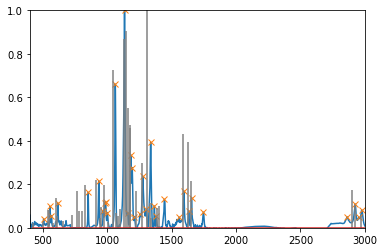

Error calculation:
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1061.673  cm-1 height  0.6609058816989103
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1182.208  cm-1 height  0.33512619524127196
error >  30.0 , skipping the experimental peak  1192.816  cm-1 height  0.27688597954191685
error >  30.0 , skipping the experimental peak  1274.78  cm-1 height  0.2360809984434067
error >  30.0 , skipping the experimental peak  1336.494  cm-1 height  0.39456165221258616
error >  30.0 , skipping the experimental peak  1443.529  cm-1 height  0.13067739604180564
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
error >  30.0 , skipping the experimental peak  1653.742  cm-1 height  0.1

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,497.72,0.04,0.03,7.56
1,555.43,549.51,0.10,0.08,5.92
2,566.03,580.19,0.06,0.02,-14.16
3,615.21,610.88,0.11,0.05,4.33
4,851.46,824.74,0.16,0.20,26.72
5,933.42,940.78,0.22,0.05,-7.36
6,968.14,971.47,0.08,0.20,-3.33
7,978.75,1005.03,0.12,0.03,-26.29
8,1133.99,1126.83,1.00,0.87,7.17
9,1210.17,1223.68,0.05,0.17,-13.51



 Mean absolute error: 

MAE = 13.96 cm-1
13.964747368421014 19
b3lyp-d3
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[423.878, 498.68, 540.876, 551.425, 584.031, 601.293, 612.8009999999999, 662.669, 725.963, 769.1179999999999, 781.5849999999999, 802.683, 831.453, 914.886, 946.533, 956.1229999999999, 973.385, 1005.991, 1045.31, 1071.203, 1089.424, 1099.973, 1127.7839999999999, 1144.087, 1166.144, 1176.693, 1226.561, 1245.741, 1273.552, 1309.0349999999999, 1333.01, 1384.796, 1398.222, 1403.9759999999999, 1596.735, 1632.2179999999998, 1643.7259999999999, 1651.398, 2900.016, 2918.237, 2967.1459999999997, 3005.506, 3011.2599999999998, 3058.2509999999997]


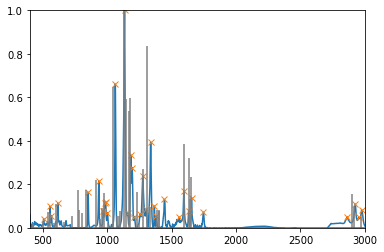

Error calculation:
error >  30.0 , skipping the experimental peak  978.7452  cm-1 height  0.11510451412052479
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1061.673  cm-1 height  0.6609058816989103
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1182.208  cm-1 height  0.33512619524127196
error >  30.0 , skipping the experimental peak  1192.816  cm-1 height  0.27688597954191685
error >  30.0 , skipping the experimental peak  1336.494  cm-1 height  0.39456165221258616
(39.55300000000011, 1443.529, 1403.9759999999999)
error >  30.0 , skipping the experimental peak
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
error >  30.0 , skipping the experimental peak  1746.313  cm-1 hei

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,498.68,0.04,0.03,6.60
1,555.43,551.42,0.10,0.07,4.00
2,566.03,584.03,0.06,0.02,-18.00
3,615.21,612.80,0.11,0.05,2.41
4,851.46,831.45,0.16,0.17,20.01
5,933.42,956.12,0.22,0.09,-22.70
6,968.14,973.38,0.08,0.16,-5.25
7,1133.99,1127.78,1.00,1.00,6.21
8,1210.17,1226.56,0.05,0.16,-16.39
9,1253.57,1245.74,0.06,0.02,7.82



 Mean absolute error: 

MAE = 11.66 cm-1
11.656069999999954 20
cam-b3lyp
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[501.17699999999996, 545.874, 556.3349999999999, 607.689, 619.101, 625.7579999999999, 732.27, 776.967, 791.232, 809.3009999999999, 835.929, 917.7149999999999, 950.049, 971.9219999999999, 989.04, 1009.011, 1059.414, 1086.042, 1114.572, 1146.906, 1172.5829999999999, 1183.995, 1188.75, 1211.5739999999998, 1243.908, 1303.821, 1340.9099999999999, 1381.8029999999999, 1394.166, 1635.72, 1661.397, 1670.907, 1685.172, 2907.207, 2918.6189999999997, 2978.5319999999997, 3009.915]


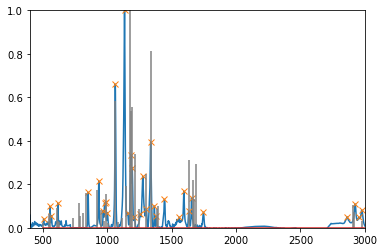

Error calculation:
error >  30.0 , skipping the experimental peak  566.033  cm-1 height  0.05567600622637313
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1133.995  cm-1 height  1.0
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1210.173  cm-1 height  0.05186791194129419
error >  30.0 , skipping the experimental peak  1303.708  cm-1 height  0.0847648432288192
error >  30.0 , skipping the experimental peak  1443.529  cm-1 height  0.13067739604180564
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
error >  30.0 , skipping the experimental peak  1594.921  cm-1 height  0.16902240382477207
(61.141000000000076, 1746.313, 1685.172)
error >  30.0 , skipping the experimental peak
e

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,501.18,0.04,0.02,4.11
1,555.43,556.33,0.10,0.06,-0.91
2,615.21,619.10,0.11,0.03,-3.89
3,851.46,835.93,0.16,0.16,15.53
4,933.42,917.71,0.22,0.17,15.71
5,968.14,971.92,0.08,0.03,-3.78
6,978.75,989.04,0.12,0.16,-10.29
7,1061.67,1059.41,0.66,0.58,2.26
8,1182.21,1188.75,0.34,0.56,-6.54
9,1192.82,1211.57,0.28,0.34,-18.76



 Mean absolute error: 

MAE = 10.49 cm-1
10.4904736842105 19
cam-b3lyp-d3
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[501.17699999999996, 545.874, 558.237, 608.64, 620.052, 627.66, 733.221, 777.918, 793.134, 810.252, 839.733, 922.4699999999999, 952.9019999999999, 974.775, 989.991, 1009.011, 1061.316, 1086.993, 1117.425, 1138.347, 1149.759, 1173.5339999999999, 1185.897, 1191.6029999999998, 1210.623, 1246.761, 1305.723, 1341.8609999999999, 1381.8029999999999, 1395.117, 1639.524, 1663.299, 1673.76, 1688.9759999999999, 2905.305, 2917.6679999999997, 2978.5319999999997, 3008.964]


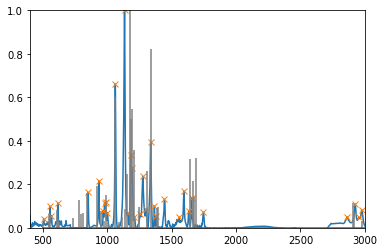

Error calculation:
error >  30.0 , skipping the experimental peak  566.033  cm-1 height  0.05567600622637313
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1210.173  cm-1 height  0.05186791194129419
error >  30.0 , skipping the experimental peak  1274.78  cm-1 height  0.2360809984434067
error >  30.0 , skipping the experimental peak  1443.529  cm-1 height  0.13067739604180564
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
error >  30.0 , skipping the experimental peak  1594.921  cm-1 height  0.16902240382477207
(57.33700000000022, 1746.313, 1688.9759999999999)
error >  30.0 , skipping the experimental peak
error >  30.0 , skipping the experimental peak  2862.95  cm-1 height

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,501.18,0.04,0.02,4.11
1,555.43,558.24,0.10,0.06,-2.81
2,615.21,620.05,0.11,0.04,-4.84
3,851.46,839.73,0.16,0.16,11.73
4,933.42,922.47,0.22,0.19,10.95
5,968.14,974.77,0.08,0.03,-6.64
6,978.75,989.99,0.12,0.15,-11.25
7,1061.67,1061.32,0.66,0.60,0.36
8,1133.99,1149.76,1.00,0.25,-15.76
9,1182.21,1191.60,0.34,0.55,-9.39



 Mean absolute error: 

MAE = 9.59 cm-1
9.593049999999982 20
m06l
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[421.293, 493.56899999999996, 536.3639999999999, 546.8249999999999, 598.179, 621.0029999999999, 656.1899999999999, 720.858, 756.045, 767.457, 795.036, 822.615, 900.597, 933.882, 970.971, 988.0889999999999, 1042.296, 1075.581, 1080.336, 1098.405, 1115.523, 1138.347, 1150.71, 1164.024, 1170.681, 1226.79, 1274.34, 1296.213, 1305.723, 1318.086, 1360.8809999999999, 1372.293, 1375.146, 1596.7289999999998, 1635.72, 1652.838, 2897.6969999999997, 2988.042, 3013.719, 3018.4739999999997, 3026.082, 3034.641]


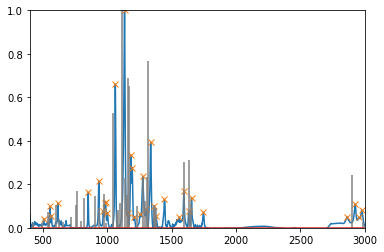

Error calculation:
error >  30.0 , skipping the experimental peak  566.033  cm-1 height  0.05567600622637313
error >  30.0 , skipping the experimental peak  978.7452  cm-1 height  0.11510451412052479
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1061.673  cm-1 height  0.6609058816989103
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1182.208  cm-1 height  0.33512619524127196
error >  30.0 , skipping the experimental peak  1192.816  cm-1 height  0.27688597954191685
error >  30.0 , skipping the experimental peak  1443.529  cm-1 height  0.13067739604180564
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
error >  30.0 , skipping the experimental peak  1746.313  cm-1 height  0.

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,493.57,0.04,0.02,11.71
1,555.43,546.82,0.10,0.06,8.60
2,615.21,621.00,0.11,0.04,-5.79
3,851.46,822.62,0.16,0.14,28.85
4,933.42,933.88,0.22,0.09,-0.46
5,968.14,970.97,0.08,0.16,-2.83
6,1133.99,1138.35,1.00,0.23,-4.35
7,1210.17,1226.79,0.05,0.10,-16.62
8,1253.57,1274.34,0.06,0.23,-20.77
9,1274.78,1296.21,0.24,0.12,-21.43



 Mean absolute error: 

MAE = 10.43 cm-1
10.431357894736813 19
wb97-xd
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[498.75, 546.25, 554.8, 606.1, 617.5, 626.05, 630.8, 730.55, 773.3, 782.8, 804.65, 836.0, 916.75, 946.1999999999999, 957.5999999999999, 970.9, 982.3, 1005.0999999999999, 1052.6, 1082.05, 1109.6, 1129.55, 1142.85, 1165.6499999999999, 1178.95, 1184.6499999999999, 1201.75, 1237.85, 1292.0, 1331.8999999999999, 1380.35, 1394.6, 1634.0, 1658.6999999999998, 1668.1999999999998, 1680.55, 2905.1, 2913.65, 2988.7, 3014.35]


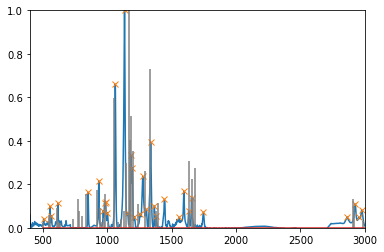

Error calculation:
error >  30.0 , skipping the experimental peak  566.033  cm-1 height  0.05567600622637313
error >  30.0 , skipping the experimental peak  986.4595  cm-1 height  0.12090004447409383
error >  30.0 , skipping the experimental peak  1000.924  cm-1 height  0.07008144318434512
error >  30.0 , skipping the experimental peak  1158.102  cm-1 height  0.07015093395597063
error >  30.0 , skipping the experimental peak  1192.816  cm-1 height  0.27688597954191685
error >  30.0 , skipping the experimental peak  1253.565  cm-1 height  0.06311846786746719
error >  30.0 , skipping the experimental peak  1303.708  cm-1 height  0.0847648432288192
error >  30.0 , skipping the experimental peak  1336.494  cm-1 height  0.39456165221258616
error >  30.0 , skipping the experimental peak  1443.529  cm-1 height  0.13067739604180564
error >  30.0 , skipping the experimental peak  1558.278  cm-1 height  0.04894929953302201
error >  30.0 , skipping the experimental peak  1594.921  cm-1 height  0.

,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,498.75,0.04,0.02,6.53
1,555.43,554.80,0.10,0.06,0.63
2,615.21,617.50,0.11,0.03,-2.29
3,851.46,836.00,0.16,0.16,15.46
4,933.42,946.20,0.22,0.09,-12.78
5,968.14,970.90,0.08,0.04,-2.76
6,978.75,982.30,0.12,0.15,-3.55
7,1061.67,1052.60,0.66,0.60,9.07
8,1133.99,1142.85,1.00,0.30,-8.86
9,1182.21,1201.75,0.34,0.35,-19.54



 Mean absolute error: 

MAE = 10.46 cm-1
10.46181111111105 18
Calculated MAEs for each functional:


,MAE,No. of assigned peaks
pbe0,10.14,21
pbe0-d3,10.39,21
b3lyp,13.96,19
b3lyp-d3,11.66,20
cam-b3lyp,10.49,19
cam-b3lyp-d3,9.59,20
m06l,10.43,19
wb97-xd,10.46,18


In [65]:
#For selected functionals read the spectra and calculate the MAEs
MAEs={}
peaks_assigned={}
for funs in functional:
    print(funs)
    theo_spec=read_theo(molecule,form,funs) 
    SF=scaling_f[funs]
    
    wavenumbers_theo=SF*theo_spec[:,0]
    heights_theo=theo_spec[:,1]/max(theo_spec[:,1])
    
    peaks_theo=theo_peaks(SF,wavenumbers_theo,heights_theo)
    
    y_theo=[wavenumbers_theo[j] for j in peaks_theo]
    print("Theoretical peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
    print(y_theo)
    h_theo=[heights_theo[j] for j in peaks_theo]
    #print(h_theo)
    no_of_peaks=len(y_theo)
    
    #draw the spectra comparison
    plt.plot(wavenumbers,heights)
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=4000)
    plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
    plt.stem(y_theo, heights_theo[peaks_theo],markerfmt=' ',linefmt='grey')
#plt.stem(y_theo,heights[peaks_theo] ,markerfmt=' ',linefmt='grey')
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=3000)
    plt.show()
    m,n=calculate_MAE()
    MAEs[funs]=m
    peaks_assigned[funs]=n
    print(m,n)
    
pd.set_option('display.precision', 2)
print("Calculated MAEs for each functional:")
df=pd.DataFrame.from_dict(MAEs,orient='index',columns=['MAE'])
df['No. of assigned peaks']=peaks_assigned.values()

display(df)
#for funs in functional:
#    print(funs,MAEs[funs],peaks_assigned[funs])
    